
# PSET 7: Molecular rotations. <br>

## Introduction

We have learned that we can describe the rotation of a molecule using a rigid rotor model. The Schrodinger equation for a rigid rotor has the form:
$$- \frac{\hbar^2}{2I} \left [ {1 \over \sin \theta} {\partial \over \partial \theta} \left ( \sin \theta {\partial \over \partial \theta} \right ) + {1 \over {\sin^2 \theta}} {\partial^2 \over \partial \varphi^2} \right] \Psi = E \Psi$$

where $I$ is the moment of inertia of the rotor. This equation has the spherical harmonics as solutions:

$$Y^{m}_{l}(\theta,\phi)=N e^{im\phi}P^{m}_{l}(\cos(\theta))$$

**Note that the spherical harmonics are complex functions**. When applying the hamiltonian we obtain:
$$\hat H Y_\ell^m (\theta, \varphi ) = \frac{\hbar^2}{2I} \ell(\ell+1) Y_\ell^m (\theta, \varphi ).$$

The energy levels for a rigid rotor are often express in terms of the constant $B$, such as:

$$E_\ell  = B\; \ell \left (\ell+1\right )\quad \textrm{with}\quad B \equiv \frac{\hbar^2}{2I}.$$

In spectroscopy is common to use the constant $\bar B$ instead of B, which is defined as,

$$ \bar B \equiv \frac{B}{hc} = \frac{h}{8\pi^2cI}, $$

and returns the energy levels in the units of *reciprocal length* (i.e. $cm^{-1}$). 

In this iPython notebook, you will have a chance to improve your understanding of molecular rotations and spherical harmonics. The exercises are closely related to demo 12 so you might want to check this demo first.<br><br>

### Let's import the modules you'll be needing, and enjoy!!

In [1]:
%matplotlib inline
import numpy as np
from scipy.special import sph_harm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib
from matplotlib import cm
import imp
import os
from matplotlib.ticker import LinearLocator, FormatStrFormatter
qworld = imp.load_source('qworld', '../library/quantumWorld.py')

/home/student/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


#### <i class="fa fa-medkit"></i> Help!
Remember you have the **help** function to ask for information on how a function is used:
```python
help(function)
```
#### <i class="fa fa-diamond"></i> Fancy plotting

The quantumWorld module also includes a function to make prettier plots via **fancy_plotting()**, with an optional argument **grid=False** which draws grids on the plot if desired.

### Instantaneous feedback :
We hope that by now you've had enough friendly exposure to iPython Notebook programming that you will be able to tackle this. Also, we've left as part of the notebook most of the figures that you should get as output if you write your code correctly, as a way to give instantaneous feedback to your code.

### <i class="fa fa-exclamation-triangle"></i> **Caution!**<br>Some of the cells below might take too long to run depending on your system specs.  If you find that a particular cell is running too slowly, modify the parameter values to increase the speed (e.g. decrease number of time steps, or the number of values on your grids.)

# <i class="fa fa-check-circle-o"></i> Exercise 1: <br>  Plotting the spherical harmonics.
## 1 point

## 1.a - Complete the functions for plotting the spherical harmonics.

As we did in demo 12, you will have to complete the functions we will need in order to plot the spherical harmonics on the surface of a 3D sphere. You only need to add three lines of code to the first function, where you transform spherical to cartesian coordinates. Remember that this transformation is carried out using the following formulas: <br><br>  
$$x = r\sin(\theta)\cos(\phi)$$ $$y = r\sin(\theta)\sin(\phi)$$ $$z = r\cos(\theta)$$

For just plotting purposes in exercise one we are going to use the base of real spherical harmonics, that are obtained with **get_real_sh**. You will have to complete the transformation from the original spherical harmonics, that are complex, to the basis of spherical harmonics that we will use in the exercise:

$$ \begin{align}
Y_{\ell m} &=
\begin{cases}
\displaystyle \sqrt{2} \, (-1)^m \, \operatorname{Im}[{Y_\ell^{m}}] & \text{if}\ m<0\\
\displaystyle  Y_\ell^m & \text{if}\ m=0\\
\displaystyle \sqrt{2} \, (-1)^m \, \operatorname{Re}[{Y_\ell^m}] & \text{if}\ m>0.
\end{cases}
\end{align}$$

Make sure to understand what the other functions do as you might some of them later.

In [2]:
def spherical_to_cartesian(theta, phi, r=1):
    '''This function converts spherical coordinates to cartesian coordinates. 
    '''
    #################
    #WRITE THREE LINES OF CODE THAT TRANSFORM SPHERICAL TO CARTESIAN COORDINATES
    #the output should be x,y,z
    x =
    y =
    z =
    #################
    
    return x,y,z

def get_real_sh(l, m, phi, theta):
    #################
    Y_lm = sph_harm(m, l, phi, theta) 
    #COMPLETE THE MISSING THREE LINES OF CODE TO CALCULATE THE REAL 
    # SPHERICAL HARMONICS
    if m<0:
        Y_lm_real = 
    elif m>0:
        Y_lm_real = 
    else:
        Y_lm_real = 
    #################
    return Y_lm_real
    
def plot_spherical_harmonics(l, m, theta, phi, ax):
    '''this function does some matplotlib trickery to plot the 
    real Y_lm spherical harmonics
    on the surface of a 3D sphere as a colormap. 
    '''
    theta_mg, phi_mg = np.meshgrid(theta, phi)
    Y_lm_real = get_real_sh(l, m, phi_mg, theta_mg)

    color_map = matplotlib.cm.get_cmap(name='seismic', lut=None)
    cm = matplotlib.cm.ScalarMappable(norm=None, cmap=color_map)
    mapped_Y_lm = cm.to_rgba(Y_lm_real)
    
    x,y,z = spherical_to_cartesian(theta_mg, phi_mg, r=1)
    #x,y,z = spherical_to_cartesian(theta_mg, phi_mg - np.pi/2.0, r=1)
    
    dt = np.dtype(object) 
    colors = np.zeros(Y_lm_real.shape, dtype = dt)

    for ph in range(len(phi)):
        for th in range(len(theta)):
            colors[ph,th] = mapped_Y_lm[ph,th]
    
    surf = ax.plot_surface(x,y,z, facecolors = colors)
    ax.view_init(20, 45)
    ax.set_title('l='+str(l)+' m='+str(m))
    ax.set_xlabel('x',fontsize=16)
    ax.set_ylabel('y',fontsize=16)
    ax.set_zlabel('z',fontsize=16)
    
def plot_spherical_harmonics_many_m(l, fig, theta, phi):
    '''
    This function plots on several subplots inside a singel figure the spherical harmonics
    Y_l,0 Y_l,1, Y_l,2.. Y_l,l. (that is, many m for a single value of l)
    '''
    num_rows = 1
    num_cols = 2*l+1
    for m in range(-l,l+1,1):
        ax = fig.add_subplot(num_rows,num_cols,m+l+1,projection='3d')
        plot_spherical_harmonics(l, m, theta, phi, ax)
        
def plot_on_sphere(f_xyz, theta_mg, phi_mg, ax):
    '''This python function plots any f_xyz function as a colormap on the surface of a sphere. 
    '''
    color_map = matplotlib.cm.get_cmap(name='seismic', lut=None)
    cm = matplotlib.cm.ScalarMappable(norm=None, cmap=color_map)
    mapped_f_xyz = cm.to_rgba(f_xyz)
    
    x,y,z = spherical_to_cartesian(theta_mg, phi_mg, r=1)
    #x,y,z = spherical_to_cartesian(theta_mg, phi_mg - np.pi/2.0, r=1)
    
    dt = np.dtype(object) 
    colors = np.zeros(f_xyz.shape, dtype = dt)

    for ph in range(len(phi)):
        for th in range(len(theta)):
            colors[ph,th] = mapped_f_xyz[ph,th]
    
    cosa=ax.plot_surface(x,y,z, facecolors = colors)
    ax.view_init(20, 45)
    return cosa

## 1.b - Plot the spherical harmonics.

Now we will plot the spherical harmonics for $l=0\;$ and $l=1\;$ for all the possible values of $m$. 

First, create an array of theta $\theta$ values that goes from 0 to $\pi$ and an array of phi $\phi$ that goes from 0 to $2\pi$. (**Use a spacing of 0.02**)

In [3]:
# CREATE AN ARRAY theta THE GOES FROM 0 TO 2PI AND AN ARRAY PHI THAT GOES FROM O TO PI
# USE INTERVALS OF 0.05
phi =
theta = 

### <i class="fa fa-line-chart"></i> Now plot!

/home/student/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:3017: ComplexWarning: Casting complex values to real discards the imaginary part
  output = self._data.astype(newtype).view(type(self))


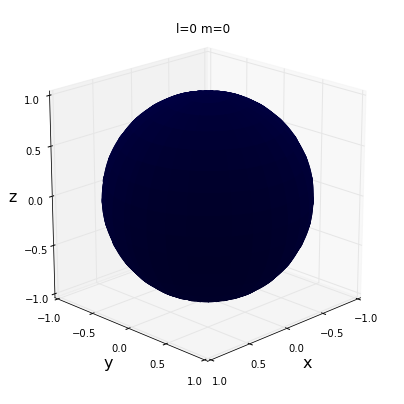

In [4]:
fig = plt.figure()
fig.set_size_inches(7, 7)
l=0
# USE THE FUNCTION plot_spherical_harmonics_many_m(l, fig)



#### Now repeat for l=1

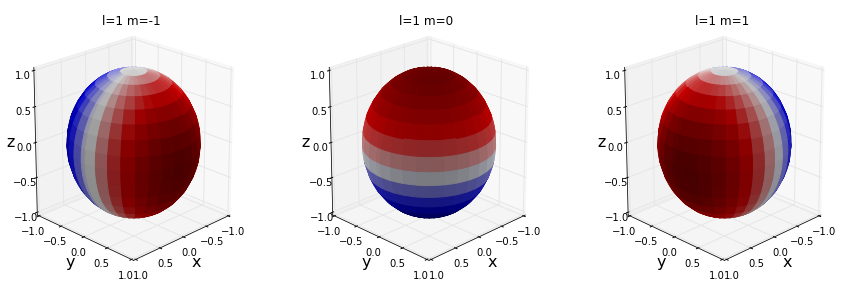

In [5]:
fig = plt.figure()
fig.set_size_inches(15, 5)
l=1
# USE THE FUNCTION plot_spherical_harmonics_many_m(l, fig)


## 1.c - Create superpositions of spherical harmonics.

Now generate the following superpositions, with equal weights of each wavefunction:<br>
 1. $Y_{00}$ and $Y_{10}$. Call it $\Psi_1$.
 2. $Y_{00}$ and $Y_{11}$. Call it $\Psi_2$.
 3. $Y_{00}$ and $Y_{1-1}$. Call it $\Psi_3$.
<br>

And plot them.

In [6]:
#Meshgrid
theta = np.arange(0, np.pi, 0.02)
phi = np.arange(0, 2*np.pi, 0.02)
theta_mg, phi_mg = np.meshgrid(theta, phi)

#Get spherical harmonic Y_00, use get_real_sh and theta_mg and phi_mg
Y_lm_00 =

#Get sphericals harmonic for Y_11 Y_10 and Y_1-1,  use get_real_sh and theta_mg and phi_mg
Y_lm_10 = 
Y_lm_11 = 
Y_lm_1_1 = 

# MAKE INITIAL LINEAR COMBINATION (EQUAL SUPERPOSITION) 
c1_0 = 
c2_0 = 
Psi_1 = 
Psi_2 = 
Psi_3 = 

### <i class="fa fa-line-chart"></i> Now plot!

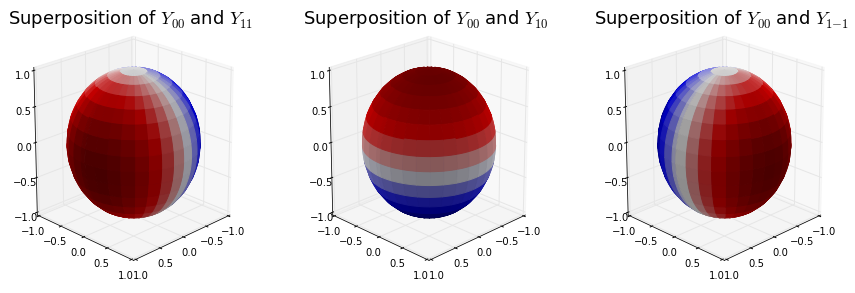

In [7]:
#Plot the pdf of the initial linear combination on the surface of a sphere as a color map: 
fig = plt.figure()
fig.set_size_inches(15, 5)
ax = fig.add_subplot(1,3,1,projection='3d')
plot_on_sphere(Psi_2, theta_mg, phi_mg, ax)
ttl=plt.title('Superposition of $Y_{00}$ and $Y_{11}$',fontsize=18)
ax = fig.add_subplot(1,3,2,projection='3d')
plot_on_sphere(Psi_1, theta_mg, phi_mg, ax)
ttl=plt.title('Superposition of $Y_{00}$ and $Y_{10}$',fontsize=18)
ax = fig.add_subplot(1,3,3,projection='3d')
plot_on_sphere(Psi_3, theta_mg, phi_mg, ax)
ttl=plt.title('Superposition of $Y_{00}$ and $Y_{1-1}$',fontsize=18)

# <i class="fa fa-check-circle-o"></i> Exercise 2: Time propagation and dipole moment of rotational wavefunctions. <br>  
## 1 point <br>

## 2-a. Compute the expectation value of the dipole moment for a rigid rotor.

![](files/dipole.gif)

The expectation value of the dipole moment operator ${\bf \hat{\mu}}=-q{\bf \hat{r}}$ corresponds to the integral 

$$ \langle \mu \rangle = \int \Psi^{*}({\bf x}) {\bf \hat{\mu}}({\bf x}) \Psi({\bf x}) d{\bf x}$$ where $({\bf x})$ represents the degrees of freedom of the system and $\Psi({\bf x})$ is the wavefunction. The same operator provides the transition dipole moment integral between two states which determines the strength of the transition at a given electric field:
$$t_{12}=\int \Psi^{*}_1({\bf x}) {\bf \hat{\mu}}({\bf x}) \Psi_2({\bf x}) d{\bf x}$$

Now we will compute the expectation value of the dipole moment and the transition integrals for a rigid rotor in an eigenstate and also in a superposition of eigenstates.

Consider the dipole moment integral between two spherical harmonics in spherical coordinates:
$$ I_{l_1,m_1,l_2,m_2}=\int^{2\pi}_{0}\int^{\pi}_{0} Y^*_{l_1 m_1}(\theta,\phi) \ {\bf \hat{\mu}} \ Y_{l_2 m_2}(\theta,\phi) \ sin(\theta) d\theta \ d\phi$$ 

Complete the function below that computes the integrand for the integral described above. The expression for the dipole moment in spherical coordinates is:

$$ {\bf \hat{\mu}} = \mu_0 ( sin(\theta) cos(\phi) \vec{i} + sin(\theta) sin(\phi) \vec{j} + cos(\theta) \vec{k}) $$

where $\mu_0$ is the value of the dipole moment of the molecule (obtained after integrating in the r coordinate) and $\vec{i}, \ \vec{j} \ \text{and} \ \vec{k}$ represent the **unit** vectors. We have written the dipole moment for you, you need to add the rest of the ingredients.<br><br>

### For the rest of the pset we are going to use the function sph_harm to generate the spherical harmonics. 

### This function returns the complex definition of the spherical harmonics: $$Y^{m}_{l}(\theta,\phi)=N e^{im\phi}P^{m}_{l}(\cos(\theta))$$ and its syntax is:

    sph_harm(m, l, phi, theta) 

In [30]:
def dipole_moment_integrand(phi, theta, mu, l1, m1, l2, m2 ):
    """ INPUTS:
    phi: real value in [0,2pi]
    theta: real value in [0,pi]
    mu: dipole moment of the molecule
    l1, m1: quantum numbers for the first spherical harmonic
    l2, m2: quantum numbers for the second spherical harmonic
    OUTPUT:
    Integrand evaluated at (phi,theta)
    """
    mu_operator=mu*(np.sin(theta)*np.cos(phi) + np.sin(theta)*np.sin(phi) + np.cos(theta))

    return integrand

Now consider a normalized superposition of two spherical harmonics, 

$$Y(\theta,\phi)=c_1 Y_{l_1 m_1}(\theta,\phi) + c_2 Y_{l_2 m_2}(\theta,\phi)$$

We can compute the expectation value for the dipole moment of this state as:

$$ \int^{2\pi}_{0}\int^{\pi}_{0} Y^{*}(\theta,\phi) \ {\bf \hat{\mu}} \ Y(\theta,\phi) \ sin(\theta) d\theta \ d\phi$$ 

Write a function that receive the coefficients of the superposition and the values of $l_1$, $l_2$, $m_1$ and $m_2$ and returns the integrand of the equation above.

In [31]:
def dipole_moment_integrand_superposition(phi, theta, mu, c1, c2, l1, m1, l2, m2):
    """INPUTS:
    phi: real value in [0,2pi]
    theta: real value in [0,pi]
    mu: dipole moment of the molecule
    c1, c2: normalized coefficients for the superposition
    l1, m1: quantum numbers for the first spherical harmonic
    l2, m2: quantum numbers for the second spherical harmonic
    OUTPUT:
    Integrand evaluated at (phi,theta) for the superposition 
    Y=c_1 Y^l1_m1 + c_2 Y^l2_m2"""
    mu_operator=mu*(np.sin(theta)*np.cos(phi) + np.sin(theta)*np.sin(phi) + np.cos(theta))

    return integrand

Now compute the expectation values of the dipole moment for the spherical harmonics (l=0 and l=1) and the superpositions you created in point 1.a using the functions you just defined. To perform the integration use the function **integrate.nquad** from scipy, that performs integration in several dimensions. You will use it to integrate in two dimensions ($\theta$ and $\phi$), so the syntax you will use is:

**integral, error = integrate.nquad(function,[a,b],[c,d],args)**

where [a,b] and [c,d] are the limits for the integration for phi and theta, respectively, and args represents the extra arguments required for the function. Use $\mu_0= 0.425 a.u.$, which corresponds to the dipole moment for HCl in atomic units.

In [50]:
from scipy import integrate
mu=0.425
# HERE YOU HAVE AN EXAMPLE FOR COMPUTING THE EXPECTATION VALUE OF THE DIPOLE MOMENT FOR Y_0^0
dipole_moment, error=integrate.nquad(dipole_moment_integrand, [[0,2.0*np.pi],[0,np.pi]], args=[mu,0,0,0,0])
print "The dipole moment for $Y^0_0$ is: ",dipole_moment," with precision: ",error

# COMPLETE THE REST


The dipole moment for $Y^0_0$ is:  3.55231968374e-17  with precision:  2.33744117032e-15
The dipole moment for $Y^1_1$ is:  4.93926477909e-17  with precision:  3.19852411852e-15
The dipole moment for the first superposition is:  0.235558909829  with precision:  3.88959128589e-14
The dipole moment for the second superposition is:  -0.166565302509  with precision:  5.295579647e-11
The dipole moment for the third superposition is:  0.166565302509  with precision:  5.30064579605e-11


### <i class="fa fa-question-circle"></i> Question <br> Given what you have calculated, do you expect to meausre any electric field from the "rigid molecular rotor"  in $Y_{00}$ and $Y_{11}$ ?What about rigid rotor in the superpositions of eigenstates? 

#### Answer here

## 2-b. Propagate a superposition of 2 rotational eigenstates.

![](files/HCl.png)

We will now see how the dipole moment of the three superpositions changes in time. For this calculation we will use the relevent constants for the HCl molecule that has $B=4.82671733 \times 10^{-5} .a.u.$ and $\mu_0=0.425 a.u.$. For each step in the propagation compute the time dependent coefficients and the expectation value of the dipole moment as you did in exercise 2-a and save it.

**Before continuing, review the expression for the energy $E_l$ of the $Y_{l,m}$ eigenstate.** 

In [48]:
from matplotlib import animation

# HERE COMPUTE THE ENERGIES, ASSIGN TO E1 AND E2 (2 LINES)
B=4.82671733*10**(-5)
l1=0
l2=1

mu=0.425
E1 =
E2 =

# MAKE INITIAL LINEAR COMBINATION (EQUAL SUPERPOSITION) (3 LINES)
c1_0 = np.sqrt(1.0/2.0)
c2_0 = np.sqrt(1.0/2.0)

#Time evolve an plot at each time step. 
#Create a time array that goes from t=0 to t=3 in steps of 0.1
t_array = np.arange(0,70000,4000)
dipole_moments_1=np.zeros(len(t_array))
dipole_moments_2=np.zeros(len(t_array))
dipole_moments_3=np.zeros(len(t_array))

#Write a for loop that loops over each value of the time array. 
for i in range(len(t_array)):
    #Get the i-th time value. 
    t = t_array[i]
    print "time:",t
    ###################
    #USE THE cn_t_function IN qworld TO GET THE VALUE OF THE cn COEFFICIENT AT TIME t 
    #assign to variables c1_t and c2_t (2 LINES)
    c1_t = 
    c2_t = 
    ###################
        
    #####################
    # COMPUTE THE EXPECTATION VALUE OF THE DIPOLE MOMENT
    dipole_moments_1[i], error = 
    dipole_moments_2[i], error = 
    dipole_moments_3[i], error = 
    ###############################################    ###############################################

time: 0
time: 4000
time: 8000
time: 12000
time: 16000
time: 20000
time: 24000
time: 28000
time: 32000
time: 36000
time: 40000
time: 44000
time: 48000
time: 52000
time: 56000
time: 60000
time: 64000
time: 68000


### <i class="fa fa-line-chart"></i> Now plot the electric field!

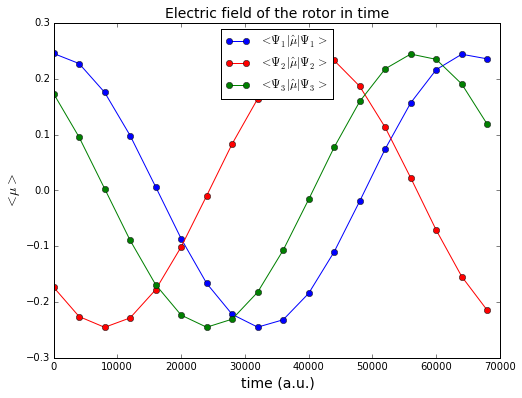

In [49]:
fig=plt.figure(figsize=(8,6))
plt.plot(t_array,dipole_moments_1,'-bo',label='$<\Psi_1|\hat{\mu}|\Psi_1>$')
plt.plot(t_array,dipole_moments_2,'-ro',label='$<\Psi_2|\hat{\mu}|\Psi_2>$')
plt.plot(t_array,dipole_moments_3,'-go',label='$<\Psi_3|\hat{\mu}|\Psi_3>$')
plt.title("Electric field of the rotor in time",fontsize=14)
plt.ylabel('$<\mu>$',fontsize=14)
plt.xlabel('time (a.u.)',fontsize=14)
plt.legend(loc='upper center')
plt.show()

### <i class="fa fa-question-circle"></i> Question <br> How do you interpret this plot? Does the dipole moment oscillate at the same frequency for the 3 different superposition? Would the dipole moment of the 3 different superposition have the same phase response to an applied electric field?  

# 3 - <i class="fa fa-check-circle-o"></i> Exercise 3: Applications of rotational spectroscopy.

## 0.5 points <br>

###  Name an example (different from the one discussed in Dave's lecture) of how rotational spectroscopy is being used in either scientific or non-scientific applications.

Write at least 1 paragraph describing the particular application and the specific role of rotational spectroscopy. Include appropriate references as hyperlinks (at least 2). You can include hyperlinks using this notation:

    [**Name of the link**](http://www.nature.com/nnano/journal/v7/n5/full/nnano.2012.34.html)

which produces this hyperlink: [**Name of the link**](http://www.nature.com/nnano/journal/v7/n5/full/nnano.2012.34.html)

#### Answer here.

# <i class="fa fa-check-circle-o"></i> Exercise 4: Selection rules for the rigid rotor. <i class="fa fa-book"></i> 
## <i class="fa fa-exclamation-triangle"></i> Grad students, required, 0.5 points
## <i class="fa fa-smile-o"></i> Undergrad students, not required, 0.5 bonus point
With the functions you have defined in problem 2 you can explore the selection rules for the rigid rotor.<br><br>

### Selection rules for l.

Keeping m=0 compute the transition moment integrals between states $Y_{l_1 0}$ and $Y_{l_2 0}$ using a nested for-loop for $l_1$=0 to 5 and $l_2$= 0 to 5 (Similar to what you did in HW5).

In [34]:
#Create a matrix of zeros that has dimensions 10 by 10. 
#Call it trans_moment
trans_moment = np.zeros((5,5))

################################################
#Create a nested for loop that goes over each value l1 = 0....4 and l2 = 0...4

        ####################################
        #And for each pair of values, it evaluates the transition moment integrand


        

### <i class="fa fa-line-chart"></i> Now plot!

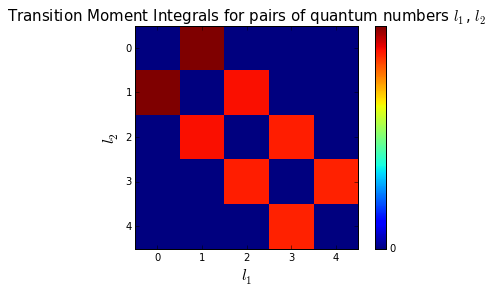

In [35]:
fig, ax = plt.subplots()
cax = ax.imshow(np.abs(trans_moment), interpolation='nearest')
#plt.imshow(np.abs(trans_moment))
ax.set_xlabel('$l_1$', fontsize = 16)
ax.set_ylabel('$l_2$', fontsize = 16)
ax.set_title('Transition Moment Integrals for pairs of quantum numbers $l_1$, $l_2$', fontsize = 15)

cbar = fig.colorbar(cax, ticks=[-1, 0, 1])

### Selection rules for m.

Keeping $l_1$=5 and $l_2=6$ compute the transition moment integrals between states $Y_{l_1 m_1}$ and $Y_{l_2 m_2}$ using a for loop, for $m_1$=-5 to 5 and $m_2$=-5 to 5.

In [36]:
#Create a matrix of zeros that has dimensions 10 by 10. 
#Call it trans_moment
trans_moment = np.zeros((11,11))

################################################
#Create a nested for loop that goes over each value m1 = -5....5 and m2 = -5...5
    ####################################
        #And for each pair of values, it evaluates the transition moment integrand


### <i class="fa fa-line-chart"></i> Now plot!

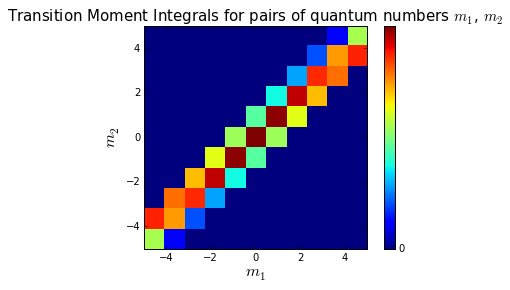

In [37]:
fig, ax = plt.subplots()
cax = ax.imshow(np.abs(trans_moment), interpolation='nearest', origin='lower', extent=[-5,5,-5,5])
#plt.imshow(np.abs(trans_moment))
ax.set_xlabel('$m_1$', fontsize = 16)
ax.set_ylabel('$m_2$', fontsize = 16)
ax.set_title('Transition Moment Integrals for pairs of quantum numbers $m_1$, $m_2$', fontsize = 15)

cbar = fig.colorbar(cax, ticks=[-1, 0, 1])

### <i class="fa fa-question-circle"></i> Questions <br> Based on the results of your exploration: what are the selection rules for the rigid rotor? <br> Would a transition between $Y^6_3$ and $Y^{7}_{2}$ be allowed? Why or why not?

#### Answer here.

# <i class="fa fa-check-circle-o"></i> Exercise 5: Asymmetric top rigid rotors and Chirality Analysis <i class="fa fa-book"></i> 
## <i class="fa fa-exclamation-triangle"></i> Grad students, required, 1 point
## <i class="fa fa-smile-o"></i> Undergrad students, not required, 1 bonus point

## 5-a. Population of rotational states.

A typical diatomic molecule such as carbon monoxide has a rotational constant of about 10 GHz.  What fraction of CO molecules at room temperature are in their rotational ground state?  (**Hint:** In the quiz about rotational spectroscopy one of the questions made reference to the relation between the intensity and a Boltzmann distribution). Generate a plot with the distribution of *relative populations* for the first 100 rotational levels of the CO molecule.

In [3]:
# WE DEFINE SOME CONSTANTS YOU MIGHT NEED
h=6.62606957E-34; # values of h
k=1.3806488E-23; # Boltzmann's constant
j=np.arange(0,100,1); # values for J
T=298; # T in Kelvins
K=10E+9; # Constant B for CO In GHz

## 5-b. Asymmetric rotors. 

The Hamiltonian for a  rigid rotor is given by
$$
\hat{H}_{rot}  = \frac{\hat{J_a^2}}{2 I_a}+\frac{\hat{J_b^2}}{2 I_b}+\frac{\hat{J_c^2}}{2 I_c},
$$
where $I_a,\, I_b,$ and $I_c$ are the moments of inertia along the molecule body-fixed frame $a,\, b,\, c,$ principal axes. For a prolate symmetric top molecule, $I_b=I_c$. We can find simultaneous eigenstates of $|J,K\rangle$ for $\hat{J}^2$ and $\hat{J_a}$:

Note that you can write
$$
\hat{J}^2|J,K\rangle=\hbar^2 J(J+1)|J,K\rangle,\,  \hat{J_a}=\hbar K|J,K\rangle, 
$$
where $J$ is the total angular momentum quantum number and $K$ is the projection of angular momentum onto the molecular principal axis $a$.

To find the energy of for an asymmetric top rotor, where $I_a\neq I_b \neq I_c$, we will solve for the eigenvalues of the Hamiltonian in the prolate symmetric top basis $|J,K\rangle$ using the following relations
$$
\hat{J_b}=\frac{\hat{J^+}+\hat{J^-}}{2},\,  \hat{J_c}=\frac{\hat{J^+}-\hat{J^-}}{2i}, 
$$
where $\hat{J^+}$ and $\hat{J^-}$ are the lowering and raising operators with respect to the body-fixed quantum number $K$. The matrix elements of the operators are given by
$$
\langle J',\, K'|\hat{J^+}|J,\,K\rangle=\hbar\sqrt{J(J+1)-K(K-1)}\delta_{J'J}\delta_{K', K-1}\\
\langle J',\, K'|\hat{J^-}|J,\,K\rangle=\hbar\sqrt{J(J+1)-K(K+1)}\delta_{J'J}\delta_{K', K+1}.
$$
<br><br>
#### 5-b. i) Rewrite the Hamiltonian matrix in terms of the $\hat{J_a}$, $\hat{J^+}$ and $\hat{J^-}$ operators and the rotational constants $A=\frac{\hbar^2}{2 I_a}$, $B=\frac{\hbar^2}{2 I_b}$, and $C=\frac{\hbar^2}{2 I_c}$. Show your work in latex or turn in on paper.

#### 5-b. ii) The 1-2 propanediol molecule has constants $A = $ 8.5721 GHz, $B = $3.6401 GHz, and $C = $2.7909 GHz.  Calculate the first 20 non-degenerate rotational levels of 1-2 propanediol. You will need to build the Hamiltonian matrix and diagonalize it. Show your work in ipython. Print the number of states and the corresponding energies for J=0 to J=4.

In [ ]:
import scipy 
# WE DEFINE SOME CONSTANTS YOU MIGHT NEED
h=6.62606957E-34;
T=298; # T in Kelvins
k=1.3806488E-23; # Boltzmann's constant
A=8.5721;
B=3.6410;
C=2.7909;

# WE HAVE LEFT SOME FEEDBACK TO COMPARE WITH FOR YOUR CALCULATIONS

CALCULATION OF ENERGY LEVELS FOR THE 1-2 PROPANEDIOL

The first state corresponds to J=0, is not degenerated and has energy 0

For J= 1  there are  3  energy levels (values in frequency (GHz)): [  6.4319  11.363   12.2131]
Each of these energy levels correspondS to  3  degenerate states

For J= 2  there are  5  energy levels (values in frequency (GHz)): [ 19.19498093  23.3767      25.927       40.7203      40.82101907]
Each of these energy levels correspondS to  5  degenerate states

For J= 3  there are  7  energy levels (values in frequency (GHz)): [ 38.09685292  41.33763572  46.43071404  60.016       60.51054708
  86.85636428  86.86388596]
Each of these energy levels correspondS to  7  degenerate states

For J= 4  there are  9  energy levels (values in frequency (GHz)): [  62.89225713   65.18421863   73.63298726   85.66499082   87.09126841
  112.76478137  112.81701274  150.09600918  150.09647446]
Each of these energy levels correspondS to  9  degenerate states

#### 5-b. iii) About what fraction of the 1-2 propanediol molecules are in the ground state at room temperature?  Why is this so much less than question 3-a?

To compare with your calculation here is the value of the rotational partition function:

The value of the rotational partition function is:  92933.8494699  summing up to the  220 th state 

The value of the ANALYTICAL rotational partition function is:  92921.0445756

## 5-c. Chirality. 
## <i class="fa fa-smile-o"></i> Grad students, not required, 0.5 bonus point

A rigid rotor also has up to 3 dipole moments, usually written $\mu_a$, $\mu_b$, and $\mu_c$.  A molecule is *chiral* if it cannot be superimposed on it's mirror image; that is, if the molecule is not an eigenstate of the parity operator $\hat{P}$. In general, we can assume that a dipole moment is non-zero unless there is a symmetry reason why it must be zero. Show that, ignoring accidental degeneracies, a molecule is chiral if and only if it has nonzero $\mu_a$, $\mu_b$, and $\mu_c$.

**Note:** The parity operator is defined as the operator that performs:
$$\hat{P}|x\rangle = |-x\rangle$$ such as it's action in a wavefunction that depends on the $\bf x$ coordinates is:
$$\hat{P}\psi(x_1,x_2,...) = \psi(-x_1,-x_2,...)$$
The two eigenvalues of $\hat{P}$ are -1 and 1, namely
$$\hat{P}\psi(x_1,x_2,...) = \pm \psi(x_1,x_2,...),$$ such as any even function will return 1 and any odd function will return -1.
